# Imports

In [71]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from IPython.display import Image
from pandas.plotting import scatter_matrix

### Load wine dataset

In [72]:
#Load wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Define variables X, Y and df

In [73]:
#Define variables X, Y and df
X=wine.data
Y=wine.target
df=pd.DataFrame(X,columns=wine.feature_names)
df.head()

#changing name of troublesome comlumn
i = wine.feature_names.index('od280/od315_of_diluted_wines')
wine.feature_names[i] = 'ratio_of_diluted_wines'
df = df.rename(columns={'od280/od315_of_diluted_wines': 'ratio_of_diluted_wines'})

# Train a default decision tree
### no.1

In [74]:
# Split dataset (train/test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

# Train a default decision tree no.1
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

# Predict and check accuracy
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

Test accuracy: 0.9444444444444444


### no.2

In [75]:
# Train a default decision tree no.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

Test accuracy: 0.9444444444444444


### no.3

In [76]:
# Train a default decision tree no.3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

Test accuracy: 0.9444444444444444


### no.4

In [77]:
# Train a default decision tree no.4
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

Test accuracy: 0.9444444444444444


### no.5

In [78]:
# Train a default decision tree no.5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

Test accuracy: 0.9444444444444444


In [79]:
# Save the trained model to disk
import joblib as jb
jb.dump(model, 'wine-decision-tree.joblib')

# Load the saved model
model = jb.load('wine-decision-tree.joblib')

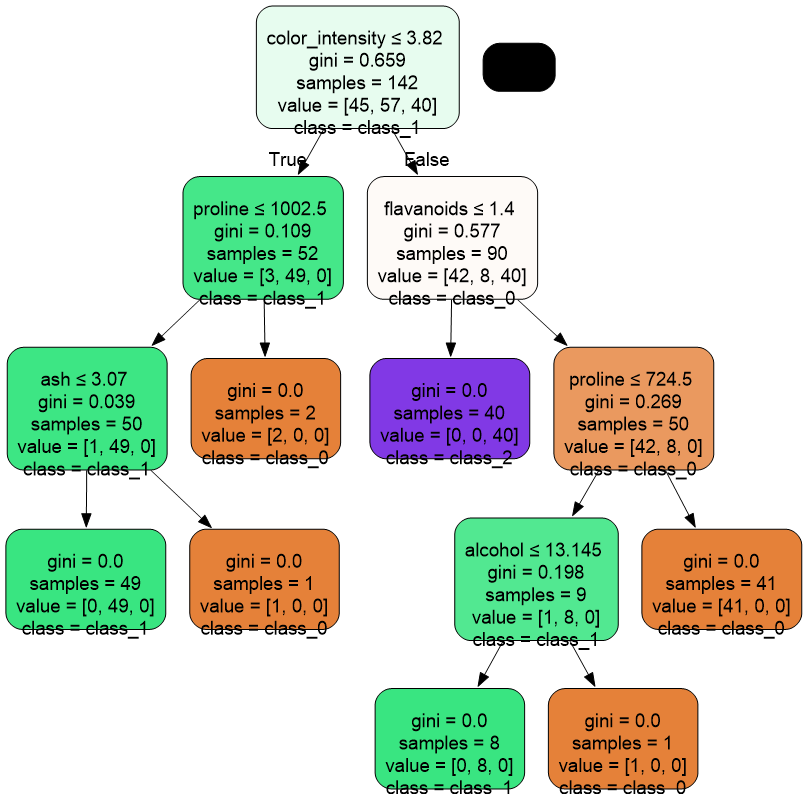

In [80]:
#Plot the tree using Graphviz and Pydotplus
#Make sure you have graphviz installed from https://graphviz.org/download/ otherwise it will not work

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


QUESTION 1.1:
In the picture above is the picture of the decision tree of the given dataset.

In [81]:
scores = cross_val_score(model, X, y, cv=10)
print("Cross validation values:", scores)
print("Cross validation mean:", scores.mean())
print("Cross validation standard deviation: ", scores.std())

Cross validation values: [0.88888889 0.88888889 0.66666667 0.88888889 0.83333333 0.83333333
 1.         0.94444444 0.94117647 0.76470588]
Cross validation mean: 0.865032679738562
Cross validation standard deviation:  0.0913519991478125


QUESTION 1.2:
Having seen the cross validation values and the mean of the cross validation scores, since it's higher than 0.9, we can assume that the tree has a good generalization and captures correctly most of the datasets patterns. Focusing now on the standard deviation, it is clear thaht the tree is moderately stable, which is probably due to the trees variance.


QUESTION 1.3:
What first draws attention is the many signle leafs with very little samples each, because that is a very clear example of overfitting. This result makes sense if we think about the value of the standard deviation of the cross validation above.
What is actually good about the tree, that also follows along the cross validation values, are the "gini" values. They suggest that the data is very well classified and the chances of each class being missclassified are very low.

# Limit the depth of the tree

Test accuracy: 0.8055555555555556



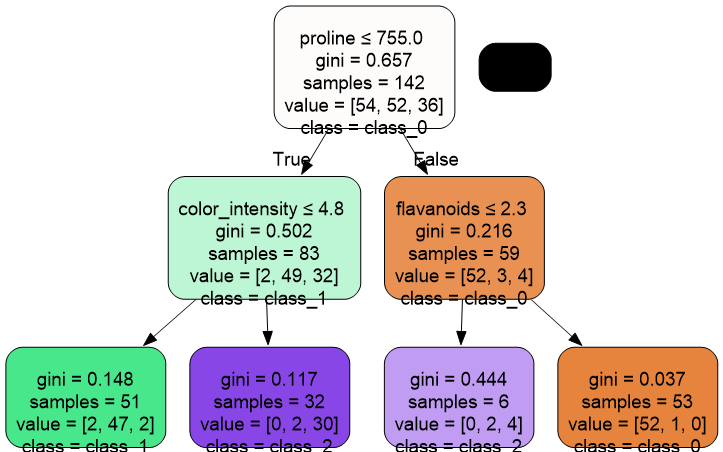

In [82]:
#Limit the depth of the tree
model = DecisionTreeClassifier(max_depth=2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy=accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

QUESTION 1.4:
The image above shows the decision tree with a limited maximum depth as asked.

QUESTION 1.5:
Having seen the tree, the firs measure that could be applied is setting a minimum amound of samples in each leaf in order to reduce the oversampling. In our case, we will fit it to 5, one sample more than the biggest small leaf. We can aslo limit the depth of the tree, since a maximum depth of 2 appears to be too superficial, we will first adjust it to 3 an, if necessary, will change it in the next tree. Finally, we will adjust the minimum amount of samples per split in order to improve our lowest fold in the cross validation scores. 
As mentioned before, if any value does not provide any improvements, or good enough improvements, it will be changed in future attemps.

0.8663398692810457 0.0864927177133297
Test accuracy: 0.8333333333333334



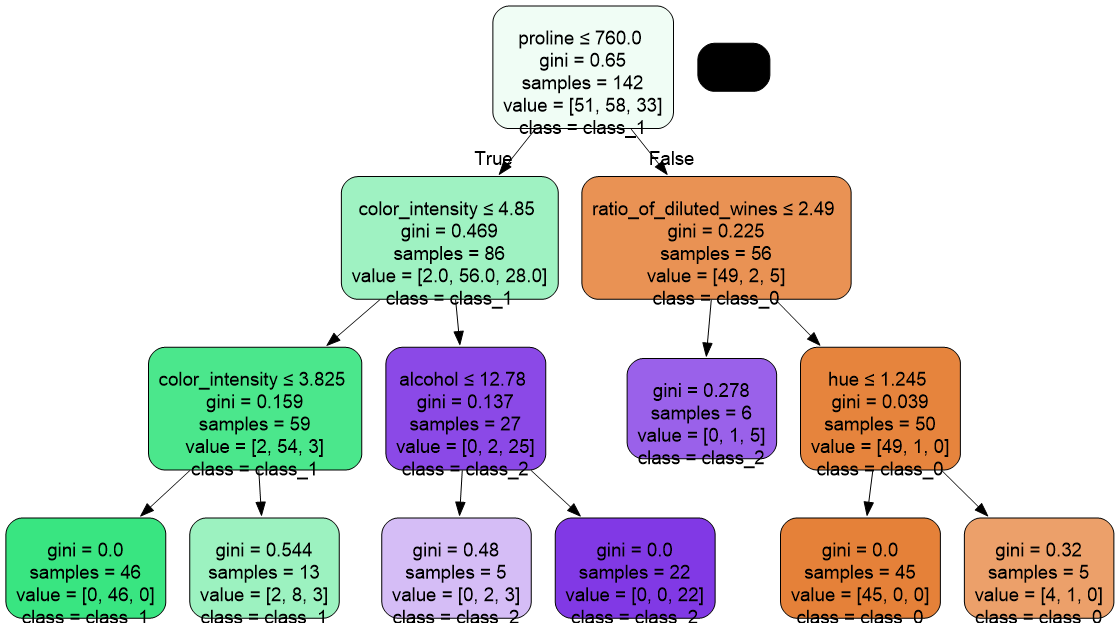

In [83]:
#Question 5 attempt 1:
model = DecisionTreeClassifier(max_depth=3, min_samples_split = 10, min_samples_leaf=5,random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy=accuracy_score(Y_test, predictions)
scores = cross_val_score(model, X, Y, cv=10)
print(scores.mean(), scores.std())
print("Test accuracy:", accuracy)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())


Seeing how the gini values have incremented dramatically, we will reduce the minimum amount of samples necessary in order to split to 5.

0.8663398692810457 0.0864927177133297
Test accuracy: 0.8333333333333334



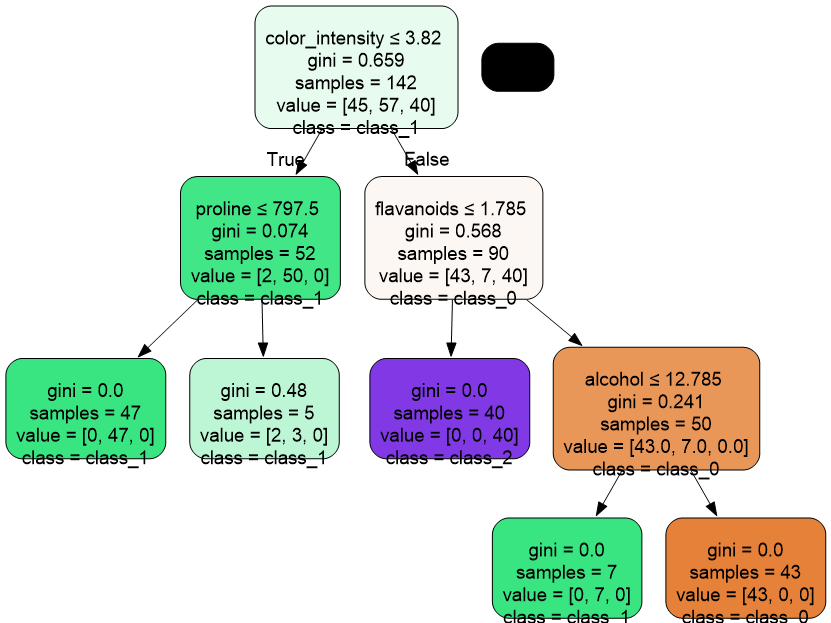

In [84]:
#Question 5 attempt 2:
model = DecisionTreeClassifier(max_depth=3 ,min_samples_split = 5, min_samples_leaf=5,random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy=accuracy_score(Y_test, predictions)
scores = cross_val_score(model, X, Y, cv=10)
print(scores.mean(), scores.std())
print("Test accuracy:", accuracy)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())



As we have been able to see from the test accuracy and the correlation tests, the second attempt has is much better because the leafs have only one class and the gini values are also better. 

QUESTION 2.1:
As it has been showed above, the standar deviation of the tree is 0.086 and the average is 0.866 and, finally, the accuracy value is 0.889.

Test accuracy: 0.9444444444444444



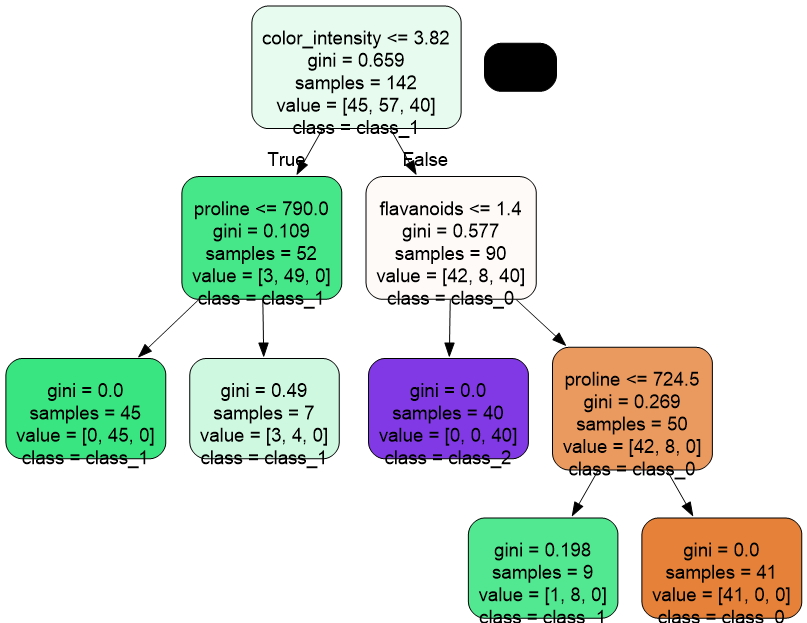

In [85]:
#Beggining of question 2.5
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

model.fit(X_train, y_train)

pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Test accuracy:", accuracy)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    filled=True,
    rounded=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


QUESTION 2.5.1 & 2.5.2
The printed value above shows the model's accuracy is aproximately 0.93. And the picture above is the decision tree obtained from the model.

In [86]:
#Cross-validation test
scores = cross_val_score(model, X, Y, cv=10)
print("Cross-validation mean:", scores.mean())
print("Cross-validation std:", scores.std())

Cross-validation mean: 0.888888888888889
Cross-validation std: 0.10540925533894598


QUESTION 2.5.3:
The mean of the cross validation scores is 0.89 and the standard deviation is 0.11. This was at first a suprising result, for we were expecting a mean of 0.93, however, upon researching, we realized tht this is due to the cross validation tests being run on all the training daat and not just the test data. This issue shows that the model performs well on the particular test split but can be less stable across all possible splits.

In [87]:
#Model's confussion matrix
df_conf = pd.DataFrame(
    conf,
    index=[f"True_{cls}" for cls in wine.target_names],
    columns=[f"Pred_{cls}" for cls in wine.target_names]
)

df_conf

,Pred_class_0,Pred_class_1,Pred_class_2
True_class_0,13,1,0
True_class_1,0,14,0
True_class_2,0,1,7


QUESTION 2.5.4:
The crosstab test allows us to identify possible relations in between data classes that might not be so obvious when simply looking at the whole data set. In this case, our crosstab shows how many data point where correctly predicted from each class, whith the diagonal values indicating the correctly predicted values and the rest of the matrix being the missclassifications.
Seeing as how most of the values are on the diagonal, we can assert that this model has great accuracy and is very consistent, for it only missclassified 2 values out of 36. This could be an explanation of why the CV mean was lower then the accuracy of the model: there might be many more false positives in the whole data set than in the test set.

In [88]:
#Model's classification report
print(classification_report(y_test, pred, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



QUESTION 2.5.5 & 2.5.6:
The table above is the cross tab report and, considering its values, it does back the results from the cross tabulation. Class_0 has a 93% recall because one of its values is missplaces, and the same happens with class_2, the value difference is because in class_0 the success rate is 13/14 and in class_2 the rate is 7/8.
As for the accuracy values and the avereges, they all coincide with the initial accuracy rate obtained at the beggining of the question, which are the expected values.

On the other hand, the crosstab and the classification report describe the performance of the model on a single test split, which produced an accuracy of 0.94.
In this split, only two misclassifications occurred.However, the cross-validation mean of 0.88 indicates that the tree does not achieve this level of performance across all of the folds. In many of the CV folds, the model probably produces more misclassifications than the two seen in the crosstab report.
This variability, however, explains why the cross-validation accuracy is lower: the tree is sensitive to how the training and test data are partitioned and shows that the model is not perfectly stable.

# Entropy

Test accuracy: 0.9444444444444444



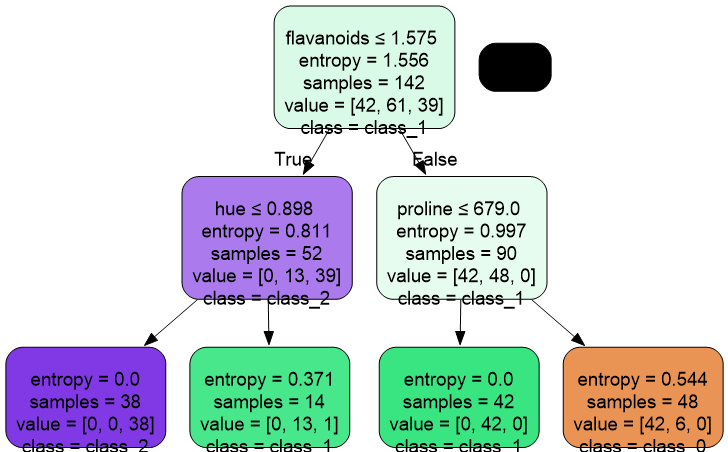

In [89]:
#Entropy
model = DecisionTreeClassifier(max_depth=2, criterion = 'entropy')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

# Limit the tree by parameters: SPLIT

Test accuracy: 0.9444444444444444



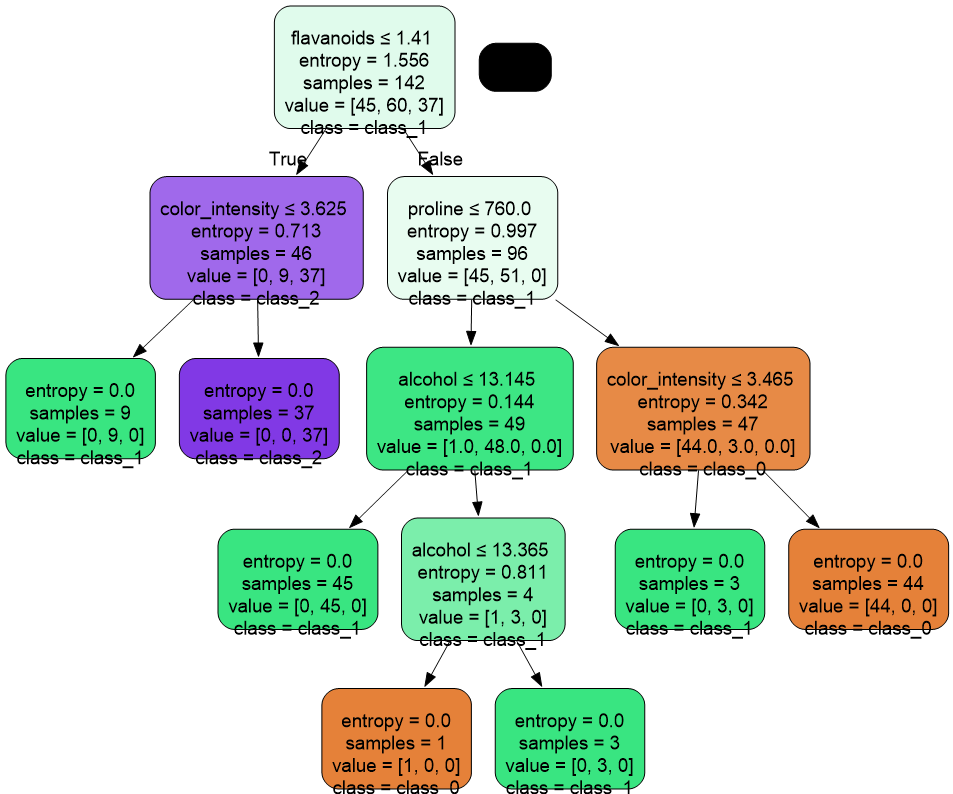

In [90]:
#Limit the tree by parameters: SPLIT
model = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 4)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

# Limit the tree by parameters: LEAF

Test accuracy: 0.9444444444444444



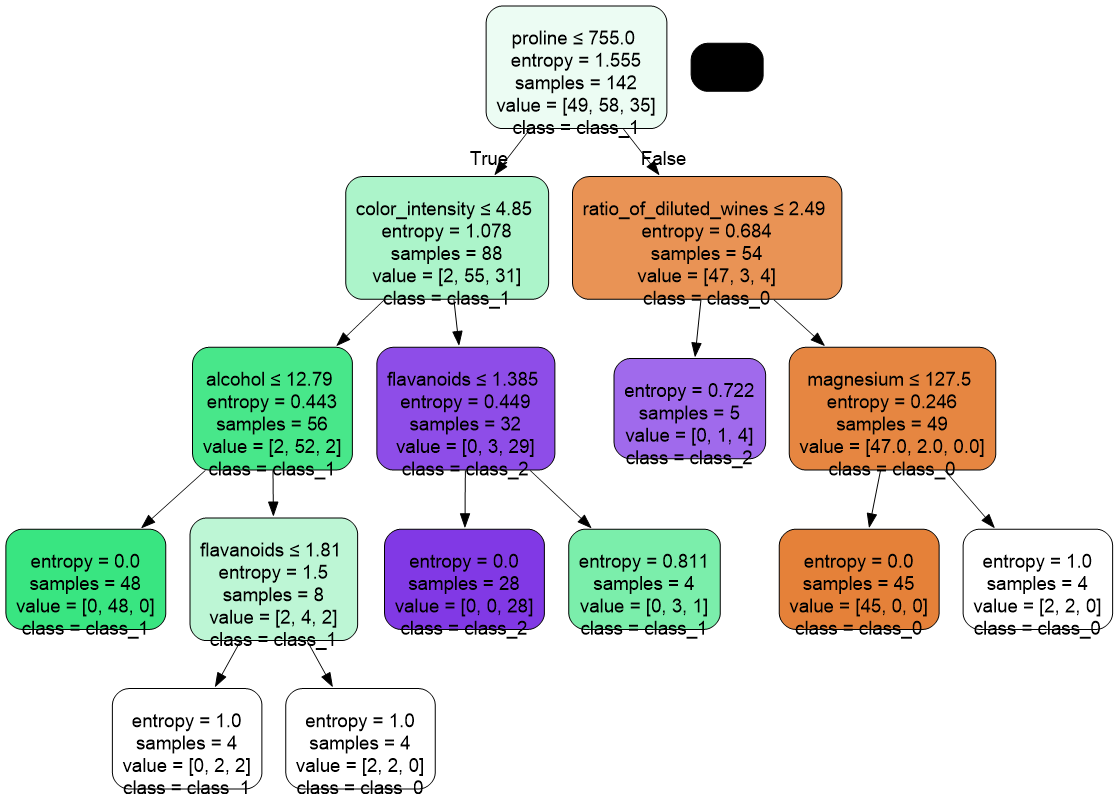

In [91]:
#Limit the tree by parameters: LEAF
model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 4)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

# Limit the tree by parameters: COMBINATION OF SPLIT AND LEAF

Test accuracy: 0.9444444444444444



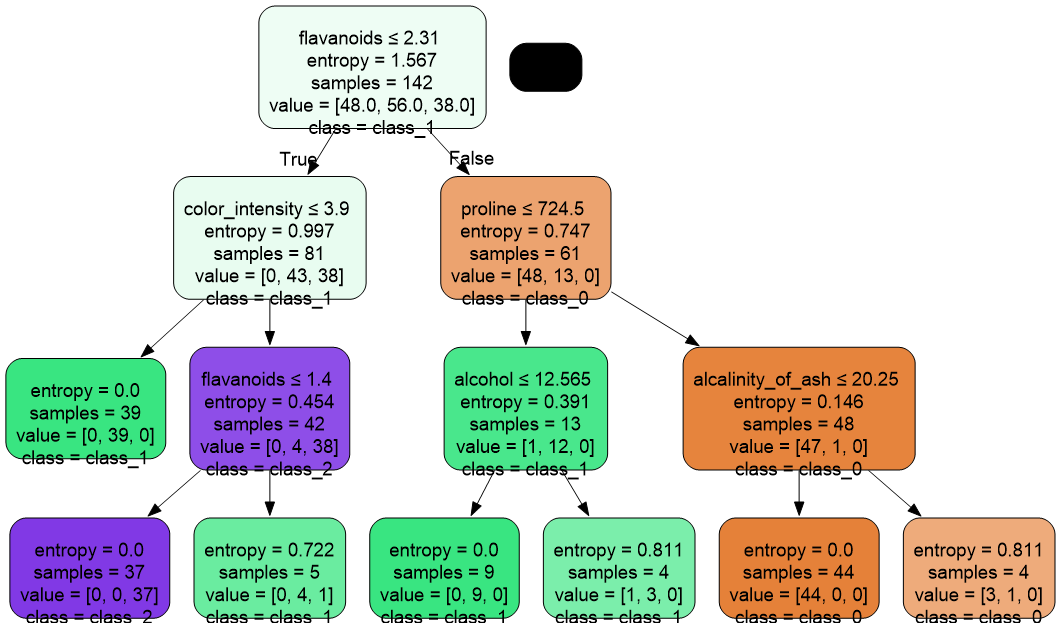

In [92]:
#Limit the tree by parameters: COMBINATION OF SPLIT AND LEAF
model = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 4, min_samples_leaf = 4 )

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)
print("Test accuracy:", accuracy)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    label='all',
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())